## Funciones

In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\andre\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [22]:
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Predi {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap

In [23]:
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [3]:
datos = pd.read_csv("winequalityN.csv") 

In [4]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
x = datos.drop(['quality'], axis=1)
y = datos['quality']

In [6]:
x

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

## Oversampling

In [10]:
random_over = RandomOverSampler()

In [11]:
x_over, y_over = random_over.fit_resample(x, y)

In [12]:
np.unique(y_over, return_counts=True)

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([2836, 2836, 2836, 2836, 2836, 2836, 2836], dtype=int64))

In [13]:
datos_over = pd.concat([x_over, y_over], axis=1)

In [14]:
datos_over

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19847,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
19848,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
19849,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
19850,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9


In [16]:
datos_over['quality'].value_counts()

quality
6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64

<Axes: title={'center': 'OverS'}, xlabel='quality'>

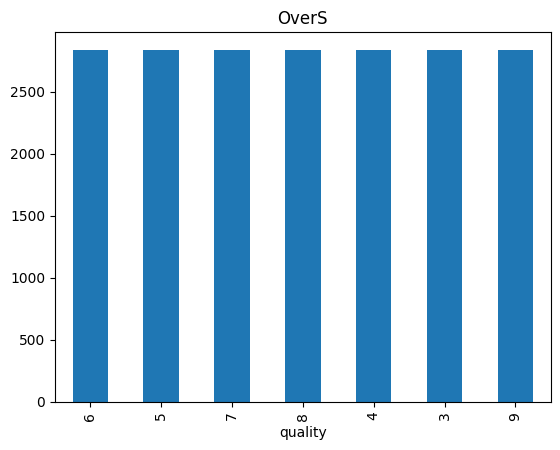

In [17]:
datos_over['quality'].value_counts().plot(kind='bar', title='OverS')

In [19]:
red_wine_data = datos_over[datos_over['type'] == 'red']
white_wine_data = datos_over[datos_over['type'] == 'white']

In [20]:
print(f"Número de datos de vino tinto: {len(red_wine_data)}")
print(f"Número de datos de vino blanco: {len(white_wine_data)}")

Número de datos de vino tinto: 4027
Número de datos de vino blanco: 15825


In [24]:
datos_over.loc[datos_over['type'] == 'red', 'type'] = 0
datos_over.loc[datos_over['type'] == 'white', 'type'] = 1

In [27]:
red_wine_data = datos_over[datos_over['type'] == 0]
white_wine_data = datos_over[datos_over['type'] == 1]

In [28]:
print(f"Número de datos de vino tinto: {len(red_wine_data)}")
print(f"Número de datos de vino blanco: {len(white_wine_data)}")

Número de datos de vino tinto: 4027
Número de datos de vino blanco: 15825


In [31]:
X = datos_over.drop('quality', axis=1)
Y = datos_over['quality']

In [32]:
mean = X.mean(axis=0)
std = X.std(axis=0)
data_normalized = (X - mean) / std

In [33]:
data_normalized

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.504438,-0.228245,-0.470053,0.27986,3.61265,-0.201605,0.507224,0.895032,2.175765,-1.45062,-0.435776,-1.536269
1,0.504438,-0.751475,-0.323252,0.141701,-0.786202,-0.100967,-0.637932,0.281952,-0.015803,0.361133,-0.162515,-1.014909
2,0.504438,0.593975,-0.421119,0.556177,0.434422,-0.075808,-0.046884,-0.282728,0.328586,0.119566,-0.504091,-0.568029
3,0.504438,-0.07875,-0.665787,0.003543,0.802912,0.125467,0.581105,1.153171,0.485127,-0.303176,-0.777352,-0.716989
4,0.504438,-0.07875,-0.665787,0.003543,0.802912,0.125467,0.581105,1.153171,0.485127,-0.303176,-0.777352,-0.716989
...,...,...,...,...,...,...,...,...,...,...,...,...
19847,0.504438,1.341447,-0.470053,0.901574,1.286555,-0.453198,-0.120765,0.152882,0.92344,-0.242785,-0.367461,-0.34459
19848,0.504438,0.070744,-0.616853,0.27986,-0.69408,-0.553836,-0.157705,0.394887,-1.095933,0.240349,-0.230831,1.219489
19849,0.504438,0.070744,-0.616853,0.27986,-0.69408,-0.553836,-0.157705,0.394887,-1.095933,0.240349,-0.230831,1.219489
19850,0.504438,-0.527233,-0.02965,-0.203695,-0.786202,-0.80543,-0.268527,-0.476332,-1.377706,1.025442,0.657268,1.145009


# División Base de Datos

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_normalized ,Y, test_size=0.3, random_state=42)

In [42]:
# Eliminar filas con valores NaN
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegúrate de actualizar y_train también

X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Asegúrate de actualizar y_val también

# Luego, puedes usar X_train y X_val en tu modelo KNeighborsClassifier

In [43]:
# Verificar la forma de los conjuntos de datos después de eliminar filas con valores faltantes
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

print("\nForma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (13826, 12)
Forma de y_train: (13826,)

Forma de X_val: (5927, 12)
Forma de y_val: (5927,)


## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_test_prueba2 = best_model.predict(X_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

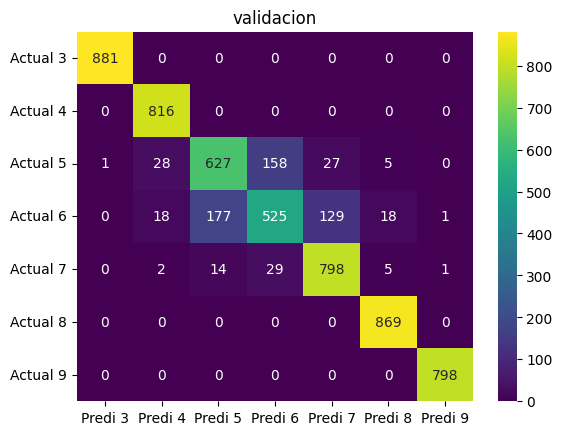

In [46]:
plot(y_val,y_pred_prueba2,"validacion")
plt.savefig("validacionKm.eps",format='eps')

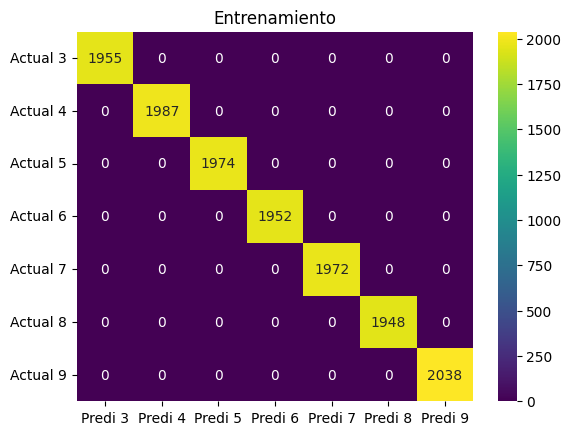

In [47]:
plot(y_train,y_test_prueba2,"Entrenamiento")
plt.savefig("EntrenamientoKm.eps",format='eps')

In [48]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.8965749957820145
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.94      1.00      0.97       816
           5       0.77      0.74      0.75       846
           6       0.74      0.60      0.66       868
           7       0.84      0.94      0.89       849
           8       0.97      1.00      0.98       869
           9       1.00      1.00      1.00       798

    accuracy                           0.90      5927
   macro avg       0.89      0.90      0.89      5927
weighted avg       0.89      0.90      0.89      5927



In [49]:
resultadosModelo(y_train, y_test_prueba2)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1987
           5       1.00      1.00      1.00      1974
           6       1.00      1.00      1.00      1952
           7       1.00      1.00      1.00      1972
           8       1.00      1.00      1.00      1948
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13826
   macro avg       1.00      1.00      1.00     13826
weighted avg       1.00      1.00      1.00     13826

